In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
Google_data = pd.read_csv('googleplaystore.csv')

In [3]:
Google_data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [4]:
Google_data.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

In [5]:
Google_data.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


In [6]:
Google_data.shape

(10841, 13)

In [7]:
type(Google_data)

pandas.core.frame.DataFrame

<AxesSubplot:>

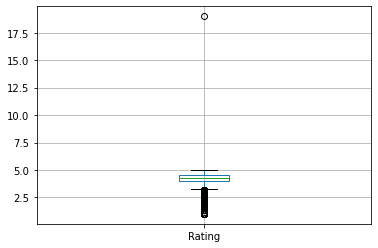

In [8]:
Google_data.boxplot()

array([[<AxesSubplot:title={'center':'Rating'}>]], dtype=object)

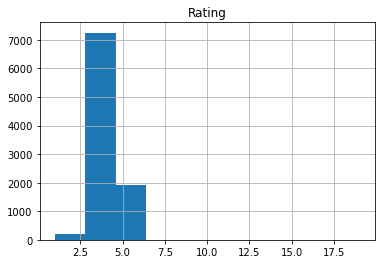

In [9]:
Google_data.hist()

In [10]:
Google_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [11]:
Google_data.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [12]:
Google_data[Google_data['Rating'] > 5]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [13]:
Google_data.drop([10472], inplace = True)

<AxesSubplot:>

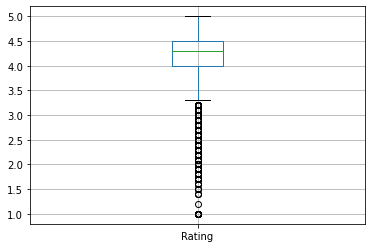

In [14]:
Google_data.boxplot()

array([[<AxesSubplot:title={'center':'Rating'}>]], dtype=object)

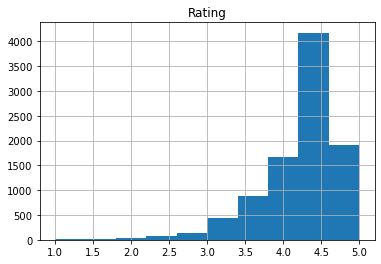

In [15]:
Google_data.hist()

In [16]:
threshold  = len(Google_data) * 0.1 # 10% of (my rows = 1084)
threshold

1084.0

In [17]:
Google_data.dropna(thresh = threshold, axis = 1, inplace = True)

In [18]:
Google_data.shape

(10840, 13)

In [19]:
def impute_median(series):
    return series.fillna(series.median())

In [20]:
Google_data.Rating = Google_data['Rating'].transform(impute_median)

In [21]:
Google_data.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              1
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       8
Android Ver       2
dtype: int64

In [22]:
print(Google_data['Type'].mode())
print(Google_data['Current Ver'].mode())
print(Google_data['Android Ver'].mode())

0    Free
dtype: object
0    Varies with device
dtype: object
0    4.1 and up
dtype: object


In [23]:
Google_data['Type'].fillna(str(Google_data['Type'].mode().values[0]), inplace = True)
Google_data['Current Ver'].fillna(str(Google_data['Current Ver'].mode().values[0]), inplace = True)
Google_data['Android Ver'].fillna(str(Google_data['Android Ver'].mode().values[0]), inplace = True)

In [24]:
Google_data.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

In [25]:
Google_data.dtypes

App                object
Category           object
Rating            float64
Reviews            object
Size               object
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

In [26]:
chars_to_remove = ["+","$", ","]
col_to_clean = ['Price','Installs']

for col in col_to_clean:
    for char in chars_to_remove:
        Google_data[col] = Google_data[col].apply(lambda x : str(x).replace(char,""))
        

In [27]:
Google_data['Price'] = Google_data['Price'].astype(float)
Google_data['Installs'] = Google_data['Installs'].astype(float)
Google_data['Reviews'] = Google_data['Reviews'].astype(float)

In [28]:
Google_data[['Price','Installs']].head()

,Price,Installs
0,0.0,10000.0
1,0.0,500000.0
2,0.0,5000000.0
3,0.0,50000000.0
4,0.0,100000.0


In [29]:
Google_data.head(10)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159.0,19M,10000.0,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14M,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510.0,8.7M,5000000.0,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644.0,25M,50000000.0,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967.0,2.8M,100000.0,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167.0,5.6M,50000.0,Free,0.0,Everyone,Art & Design,"March 26, 2017",1.0,2.3 and up
6,Smoke Effect Photo Maker - Smoke Editor,ART_AND_DESIGN,3.8,178.0,19M,50000.0,Free,0.0,Everyone,Art & Design,"April 26, 2018",1.1,4.0.3 and up
7,Infinite Painter,ART_AND_DESIGN,4.1,36815.0,29M,1000000.0,Free,0.0,Everyone,Art & Design,"June 14, 2018",6.1.61.1,4.2 and up
8,Garden Coloring Book,ART_AND_DESIGN,4.4,13791.0,33M,1000000.0,Free,0.0,Everyone,Art & Design,"September 20, 2017",2.9.2,3.0 and up
9,Kids Paint Free - Drawing Fun,ART_AND_DESIGN,4.7,121.0,3.1M,10000.0,Free,0.0,Everyone,Art & Design;Creativity,"July 3, 2018",2.8,4.0.3 and up


In [30]:
def count_enteries(df, col_name):
    long_count = {}
    col = Google_data['Category']
    for entery in col:
        if entery in long_count.keys():
            long_count[entery] += 1
        else :
            long_count[entery] = 1
    return long_count

In [31]:
count_enteries(Google_data, Google_data['Category'])

{'ART_AND_DESIGN': 65,
 'AUTO_AND_VEHICLES': 85,
 'BEAUTY': 53,
 'BOOKS_AND_REFERENCE': 231,
 'BUSINESS': 460,
 'COMICS': 60,
 'COMMUNICATION': 387,
 'DATING': 234,
 'EDUCATION': 156,
 'ENTERTAINMENT': 149,
 'EVENTS': 64,
 'FINANCE': 366,
 'FOOD_AND_DRINK': 127,
 'HEALTH_AND_FITNESS': 341,
 'HOUSE_AND_HOME': 88,
 'LIBRARIES_AND_DEMO': 85,
 'LIFESTYLE': 382,
 'GAME': 1144,
 'FAMILY': 1972,
 'MEDICAL': 463,
 'SOCIAL': 295,
 'SHOPPING': 260,
 'PHOTOGRAPHY': 335,
 'SPORTS': 384,
 'TRAVEL_AND_LOCAL': 258,
 'TOOLS': 843,
 'PERSONALIZATION': 392,
 'PRODUCTIVITY': 424,
 'PARENTING': 60,
 'WEATHER': 82,
 'VIDEO_PLAYERS': 175,
 'NEWS_AND_MAGAZINES': 283,
 'MAPS_AND_NAVIGATION': 137}

In [32]:
Google_data.describe()

,Rating,Reviews,Installs,Price
count,10840.000000,1.084000e+04,1.084000e+04,10840.000000
mean,4.206476,4.441529e+05,1.546434e+07,1.027368
std,0.480342,2.927761e+06,8.502936e+07,15.949703
min,1.000000,0.000000e+00,0.000000e+00,0.000000
25%,4.100000,3.800000e+01,1.000000e+03,0.000000
50%,4.300000,2.094000e+03,1.000000e+05,0.000000
75%,4.500000,5.477550e+04,5.000000e+06,0.000000
max,5.000000,7.815831e+07,1.000000e+09,400.000000


In [33]:
grp = Google_data.groupby('Category')
x = grp['Rating'].agg(np.mean)
y = grp['Price'].agg(np.sum)
z = grp['Reviews'].agg(np.mean)


In [41]:
print(x.head())
print(y.head())
print(z.head())

Category
ART_AND_DESIGN         4.355385
AUTO_AND_VEHICLES      4.205882
BEAUTY                 4.283019
BOOKS_AND_REFERENCE    4.335498
BUSINESS               4.182391
Name: Rating, dtype: float64
Category
ART_AND_DESIGN           5.97
AUTO_AND_VEHICLES       13.47
BEAUTY                   0.00
BOOKS_AND_REFERENCE    119.77
BUSINESS               185.27
Name: Price, dtype: float64
Category
ART_AND_DESIGN         26376.000000
AUTO_AND_VEHICLES      13690.188235
BEAUTY                  7476.226415
BOOKS_AND_REFERENCE    95060.904762
BUSINESS               30335.982609
Name: Reviews, dtype: float64


<AxesSubplot:xlabel='Category'>

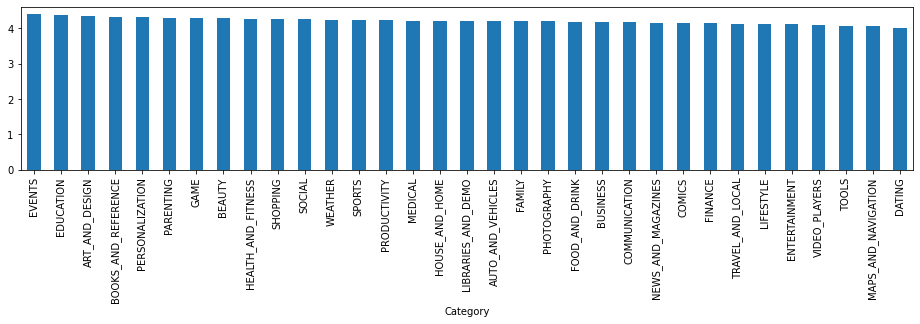

In [35]:
plt.figure(figsize = (16,3))
x.sort_values(ascending  = False).plot.bar()

<AxesSubplot:xlabel='Category'>

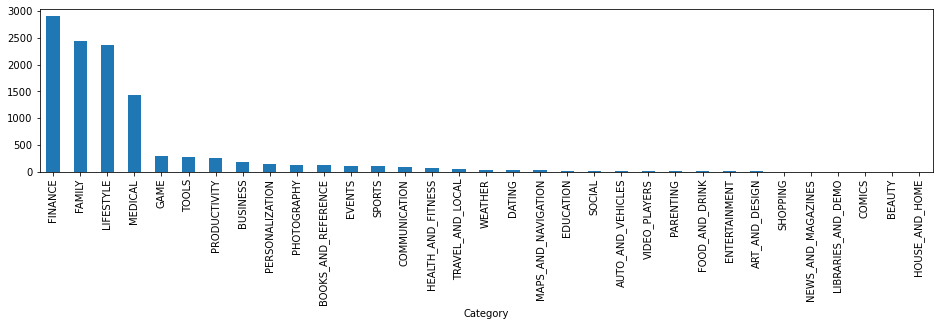

In [36]:
plt.figure(figsize = (16,3))
y.sort_values(ascending  = False).plot.bar()

<AxesSubplot:xlabel='Category'>

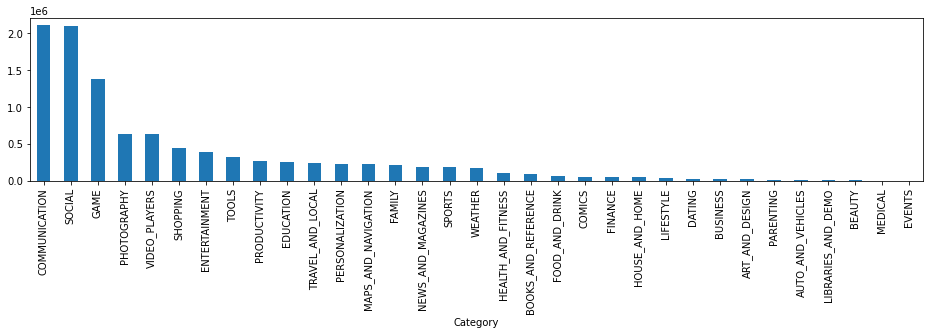

In [37]:
plt.figure(figsize = (16,3))
z.sort_values(ascending  = False).plot.bar()

In [38]:
Google_data['Last Updated'] = pd.to_datetime(Google_data['Last Updated'])

In [39]:
Google_data.to_csv('Zeid_file1.csv', index = False)

In [40]:
Google_data['Last Updated']

0       2018-01-07
1       2018-01-15
2       2018-08-01
3       2018-06-08
4       2018-06-20
           ...    
10836   2017-07-25
10837   2018-07-06
10838   2017-01-20
10839   2015-01-19
10840   2018-07-25
Name: Last Updated, Length: 10840, dtype: datetime64[ns]